# Nick Wan Data Science Bootcamp Day #4

Notes and code from Day 4

## Loading in the Data

Today we are graduating into the bigger dataset, so it's time to get the big guns rolling, WHO IS EXCITED WOOHOO.

Loading data is still the same as before:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/2023-nwbc-data.csv')
print(df.shape)
df.head()

(736626, 95)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing,batter_name
0,SL,2022-11-01,85.2,-1.52,5.47,"Bellatti, Andrew",676801,571479,strikeout,called_strike,...,0,7,Infield shift,Standard,156.0,0.0,-0.116,heart,0,"mccormick, chas"
1,SL,2022-11-01,85.3,-1.71,5.45,"Bellatti, Andrew",676801,571479,NaN,foul,...,0,7,Infield shift,Standard,145.0,0.0,0.000,shadow,0,"mccormick, chas"
2,FF,2022-11-01,94.6,-1.87,5.40,"Bellatti, Andrew",676801,571479,NaN,swinging_strike,...,0,7,Infield shift,Standard,222.0,0.0,-0.036,chase,0,"mccormick, chas"
3,FF,2022-11-01,94.5,-1.78,5.38,"Bellatti, Andrew",676801,571479,NaN,called_strike,...,0,7,Infield shift,Standard,222.0,0.0,-0.026,heart,0,"mccormick, chas"
4,FF,2022-11-01,93.7,-1.70,5.42,"Bellatti, Andrew",676801,571479,NaN,ball,...,0,7,Infield shift,Standard,222.0,0.0,0.042,chase,0,"mccormick, chas"


To start, we have to remake some of the columns that we really liked from the previous days:

In [2]:
# recreate our is_strikes column
df['is_strike'] = 0
strike_events = ['called_strike', 'swinging_strike', 'foul', 'swinging_strike_blocked', 'foul_trip', 'foul_bunt', 'missed_bunt', 'bunt_foul_tip']
df.loc[df['description'].isin(strike_events), 'is_strike'] == 1

# create a temp dataframe counting the number of times a pitcher throws a type of pitch
_df = df.loc[:, ['pitcher_name', 'pitch_name', 'is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index=False).count().rename(columns={'is_strike':'n_pitches'})

# merge this back into the original dataset
df2 = df.merge(_df, on=['pitcher_name', 'pitch_name'])
df2 = df2.loc[df2['n_pitches'] >= 100]
print(df2.shape)
df2.head()

(672545, 97)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing,batter_name,is_strike,n_pitches
0,SL,2022-11-01,85.2,-1.52,5.47,"Bellatti, Andrew",676801,571479,strikeout,called_strike,...,Infield shift,Standard,156.0,0.0,-0.116,heart,0,"mccormick, chas",0,572
1,SL,2022-11-01,85.3,-1.71,5.45,"Bellatti, Andrew",676801,571479,NaN,foul,...,Infield shift,Standard,145.0,0.0,0.000,shadow,0,"mccormick, chas",0,572
2,SL,2022-11-01,84.8,-1.71,5.43,"Bellatti, Andrew",676801,571479,NaN,ball,...,Standard,Standard,138.0,0.0,0.015,waste,0,"mccormick, chas",0,572
3,SL,2022-11-01,85.7,-1.66,5.52,"Bellatti, Andrew",641820,571479,NaN,ball,...,Standard,Standard,132.0,0.0,0.075,chase,0,"mancini, trey",0,572
4,SL,2022-11-01,85.5,-1.52,5.48,"Bellatti, Andrew",641820,571479,NaN,ball,...,Standard,Standard,148.0,0.0,0.033,shadow,0,"mancini, trey",0,572


In [3]:
# create a runs scored column
df2['runs_scored'] = df2['post_bat_score'] - df2['bat_score']
print(df2.shape)
df2.head()

(672545, 98)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing,batter_name,is_strike,n_pitches,runs_scored
0,SL,2022-11-01,85.2,-1.52,5.47,"Bellatti, Andrew",676801,571479,strikeout,called_strike,...,Standard,156.0,0.0,-0.116,heart,0,"mccormick, chas",0,572,0
1,SL,2022-11-01,85.3,-1.71,5.45,"Bellatti, Andrew",676801,571479,NaN,foul,...,Standard,145.0,0.0,0.000,shadow,0,"mccormick, chas",0,572,0
2,SL,2022-11-01,84.8,-1.71,5.43,"Bellatti, Andrew",676801,571479,NaN,ball,...,Standard,138.0,0.0,0.015,waste,0,"mccormick, chas",0,572,0
3,SL,2022-11-01,85.7,-1.66,5.52,"Bellatti, Andrew",641820,571479,NaN,ball,...,Standard,132.0,0.0,0.075,chase,0,"mancini, trey",0,572,0
4,SL,2022-11-01,85.5,-1.52,5.48,"Bellatti, Andrew",641820,571479,NaN,ball,...,Standard,148.0,0.0,0.033,shadow,0,"mancini, trey",0,572,0


To get a summary of statistics on an entire dataframe or on an individual column, you can call `describe()` on that dataframe or column:

In [4]:
df2['runs_scored'].describe()

count    672545.000000
mean          0.028695
std           0.209070
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: runs_scored, dtype: float64

Let's start building our **ERA dataframe** (ERA = earn-run-average) in the following code cells!

Something to note - *we now cannot just merge on the pitcher's name* because multiple pitchers can have the same name. If you want to do this, you need to group by a pitcher's unique ID (which most datasets should have something like this)

Also - if you want to count values in a column without having to do a group by statement, you can use the `value_counts()` function on a column. This will return as a column, so we can use the `to_frame()` function to turn it into a dataframe that can be merged back into the original era dataframe.

In [5]:
era_df = df2.loc[:, ['pitcher_name', 'pitcher', 'runs_scored']].groupby(['pitcher_name', 'pitcher'], as_index=False).sum()

_df = df2.loc[:, ['pitcher', 'game_pk', 'inning']].drop_duplicates()
_df = _df['pitcher'].value_counts().to_frame().reset_index().rename(columns={'index':'pitcher', 'pitcher':'n_innings'})

era_df = era_df.merge(_df, on=['pitcher'])
era_df['era'] = era_df['runs_scored'] / era_df['n_innings'] * 9
era_df.head()

,pitcher_name,pitcher,runs_scored,n_innings,era
0,"Abbott, Cory",676265,25,52,4.326923
1,"Abreu, Albert",656061,12,51,2.117647
2,"Abreu, Bryan",650556,26,81,2.888889
3,"Acevedo, Domingo",642758,32,82,3.512195
4,"Adam, Jason",592094,14,77,1.636364


## HOMEWORK

1. The statistic "strikeouts per 9" helps contextualize how often a pitcher strikes out their opponents over the course of a game. Calculate strikeouts per 9 for each pitcher by adding the number of times a pitcher strikes out per opponent, divide by the number of innings they threw in, then multiply by 9 to normalize the statistic over 9 innings. This is similar to the ERA calculation except with strikeout events. **NOTE: This is mandatory homework! We will use this column in the next day.** 

In [6]:
# we need to start by getting strikeouts
strikeout_events = ['strikeout', 'strikeout_double_play']
df2['strikeout'] = 0
df2.loc[df2['events'].isin(strikeout_events), 'strikeout'] = 1

_df = df2.loc[:, ['pitcher', 'strikeout']].groupby(['pitcher'], as_index=False).sum()
era_df = era_df.merge(_df, on=['pitcher'])
era_df.head()
era_df['k9'] = (era_df['strikeout'] / era_df['n_innings']) * 9
era_df.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9
0,"Abbott, Cory",676265,25,52,4.326923,45,7.788462
1,"Abreu, Albert",656061,12,51,2.117647,29,5.117647
2,"Abreu, Bryan",650556,26,81,2.888889,101,11.222222
3,"Acevedo, Domingo",642758,32,82,3.512195,58,6.365854
4,"Adam, Jason",592094,14,77,1.636364,77,9.000000


2. fielder-independent pitching (aka FIP) is similar to ERA except it tries to utilize only the events a pitcher has "control" over - home runs, walks, and strike outs. The equation of FIP is roughly:

$$
FIP = \frac{(13 \times HR) + (3 \times BB) - (2 \times K)}{IP} + 3
$$

Where:
* $HR$ is `home_run`
* $BB$ is `walk`
* $K$ is `strikeout`

Using the `era` dataframe, calculate FIP for each pitcher.

In [7]:
# need to add all these columns first
cols = ['walk', 'home_run']

for c in cols:
    df2[c] = 0
    df2.loc[df2['events'] == c, c] = 1

_df = df2.loc[:, ['pitcher', 'home_run', 'walk']].groupby(['pitcher'], as_index=False).sum()
era_df = era_df.merge(_df, on=['pitcher'])

era_df['fip'] = (((13 * era_df['home_run']) + (3 * era_df['walk']) - (2 * era_df['strikeout'])) / era_df['n_innings']) + 3
era_df.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9,home_run,walk,fip
0,"Abbott, Cory",676265,25,52,4.326923,45,7.788462,12,25,5.711538
1,"Abreu, Albert",656061,12,51,2.117647,29,5.117647,1,11,2.764706
2,"Abreu, Bryan",650556,26,81,2.888889,101,11.222222,2,30,1.938272
3,"Acevedo, Domingo",642758,32,82,3.512195,58,6.365854,9,13,3.487805
4,"Adam, Jason",592094,14,77,1.636364,77,9.000000,5,15,2.428571


3. Explore the `seaborn` gallery page and try visualizing the relationship between ERA and FIP. If you don't want to use only a scatterplot, you can use something like `sns.jointplot()` or `sns.kedplot()` to visualize the relationship between FIP and ERA.

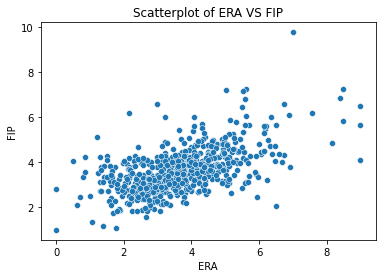

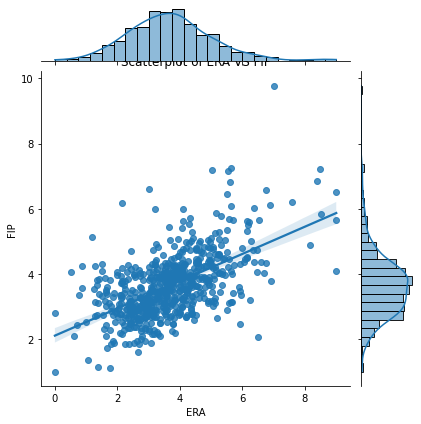

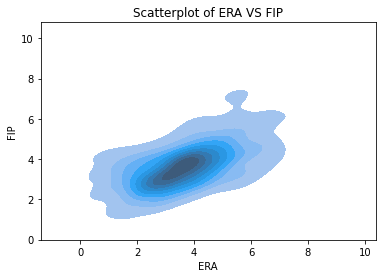

In [15]:
# SCATTERPLOT
sns.scatterplot(data=era_df, x='era', y='fip')
plt.xlabel('ERA')
plt.ylabel('FIP')
plt.title('Scatterplot of ERA VS FIP')
plt.show()

# JOINTPLOT
sns.jointplot(data=era_df, x='era', y='fip', kind='reg')
plt.xlabel('ERA')
plt.ylabel('FIP')
plt.title('Scatterplot of ERA VS FIP')
plt.show()

# KDEPLOT
sns.kdeplot(data=era_df, x='era', y='fip', fill=True)
plt.xlabel('ERA')
plt.ylabel('FIP')
plt.title('Scatterplot of ERA VS FIP')
plt.show()

> We will need the ERA dataframe for the next day, so I am saving this as era.csv

In [ ]:
era_df.to_csv('./data/era.csv', index=False)
df2.to_csv('./data/2023-nwbc-data.csv', index=False)